# Processamento Inicial

### Importa bibliotecas

In [1]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Define o diretório de trabalho

In [0]:
#workdir_path = '/mnt/5bdd0b49-a2cd-495d-a27b-f4810abd97ca/home/osias/Projects/'+\
#'Processamento de linguagem natural/Trabalho BI 2019'
#os.chdir(workdir_path)

### Leitura da base de reclamações

In [3]:
data = pd.read_csv('base reclamações.csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,Nao Informada
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,entre 31 a 40 anos
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa, Cinto, Chapé...",Produto entregue diferente do pedido,entre 21 a 30 anos
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,Nao Informada
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


### Quantidade de linhas e de colunas do dataframe lido

In [0]:
data.shape

(42307, 8)

## Colunas da tabela

In [0]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

### Localização das colunas com valores "null"

In [0]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Tratamento das empresas

### Separação da coluna das empresas

In [0]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa']

### Verificação se há algum "null"

In [0]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

### Remoção dos "nulls" encontrados

In [0]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

### Substitui:

#### " " por "_" (espaço)

#### "/" por "" 

#### "," por "" 

#### "(" por "" 

#### ")" por "" 

#### "-" por ""

#### "." por ""

#### "\t" por "" (tab)

### para o wordcloud funcionar

In [0]:
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

### Converte o nome das empresas para letras minúsculas

In [0]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

### Apreciação inicial do que foi obtido

In [0]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil_sa                                  1150
claro_sa                                              1125
tim_celular_sa                                         786
via_varejo_sa                                          516
eletropaulo_metropolitana_eletricidade_de_s_paulo      480
                                                      ... 
mas_cobrança_e_reestruturaçao_de_ativos_financeiro       1
mas_informatica_ltda__contato_informática                1
mas_informatica_ltda__me                                 1
masima_incorporações_&_empreedimentos_ltda               1
123_viagem_de_turismo_ltda                               1
Length: 10607, dtype: int64


### Criação de uma string única com todas as ocorrências dos nomes das empresas

In [0]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

### Geração do wordcloud das 40 empresas mais reclamadas

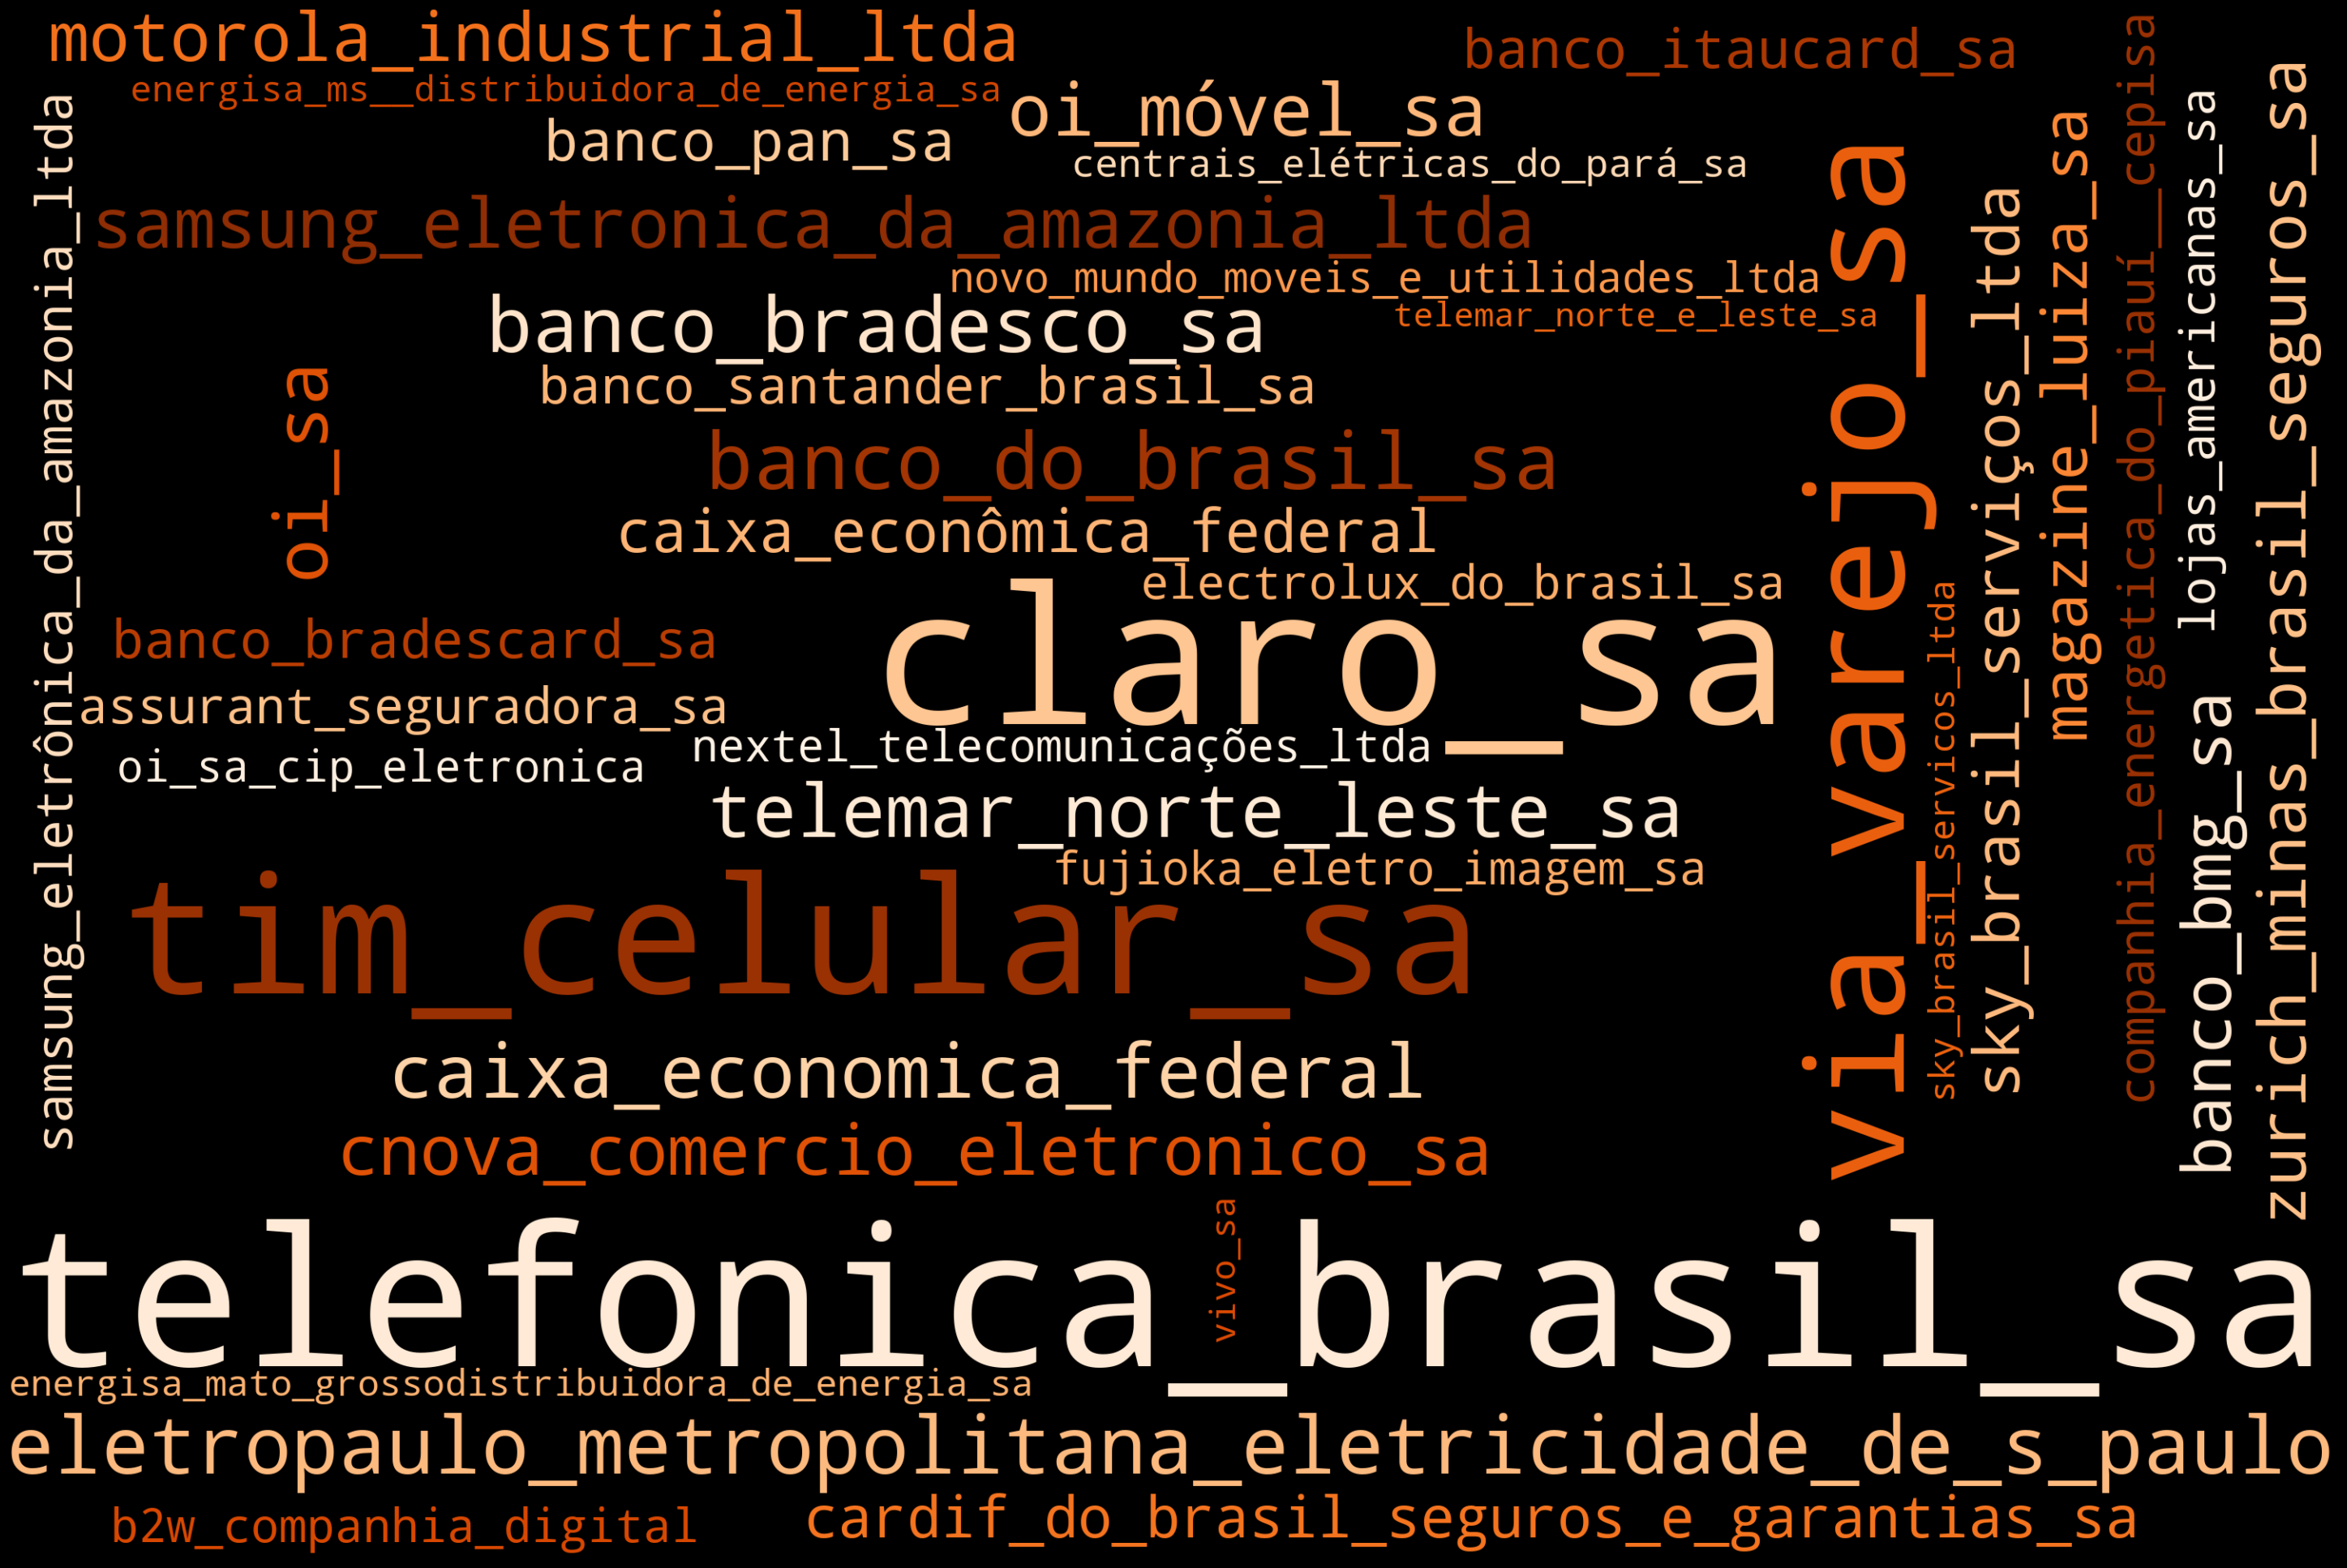

In [0]:
wordcloud_empresas = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=40
                             ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

### Para ficar mais claro, é interessante um diagrama de barras ordenado pela quantidade decrescente de problemas, limitado aos 45 mais reclamados. 

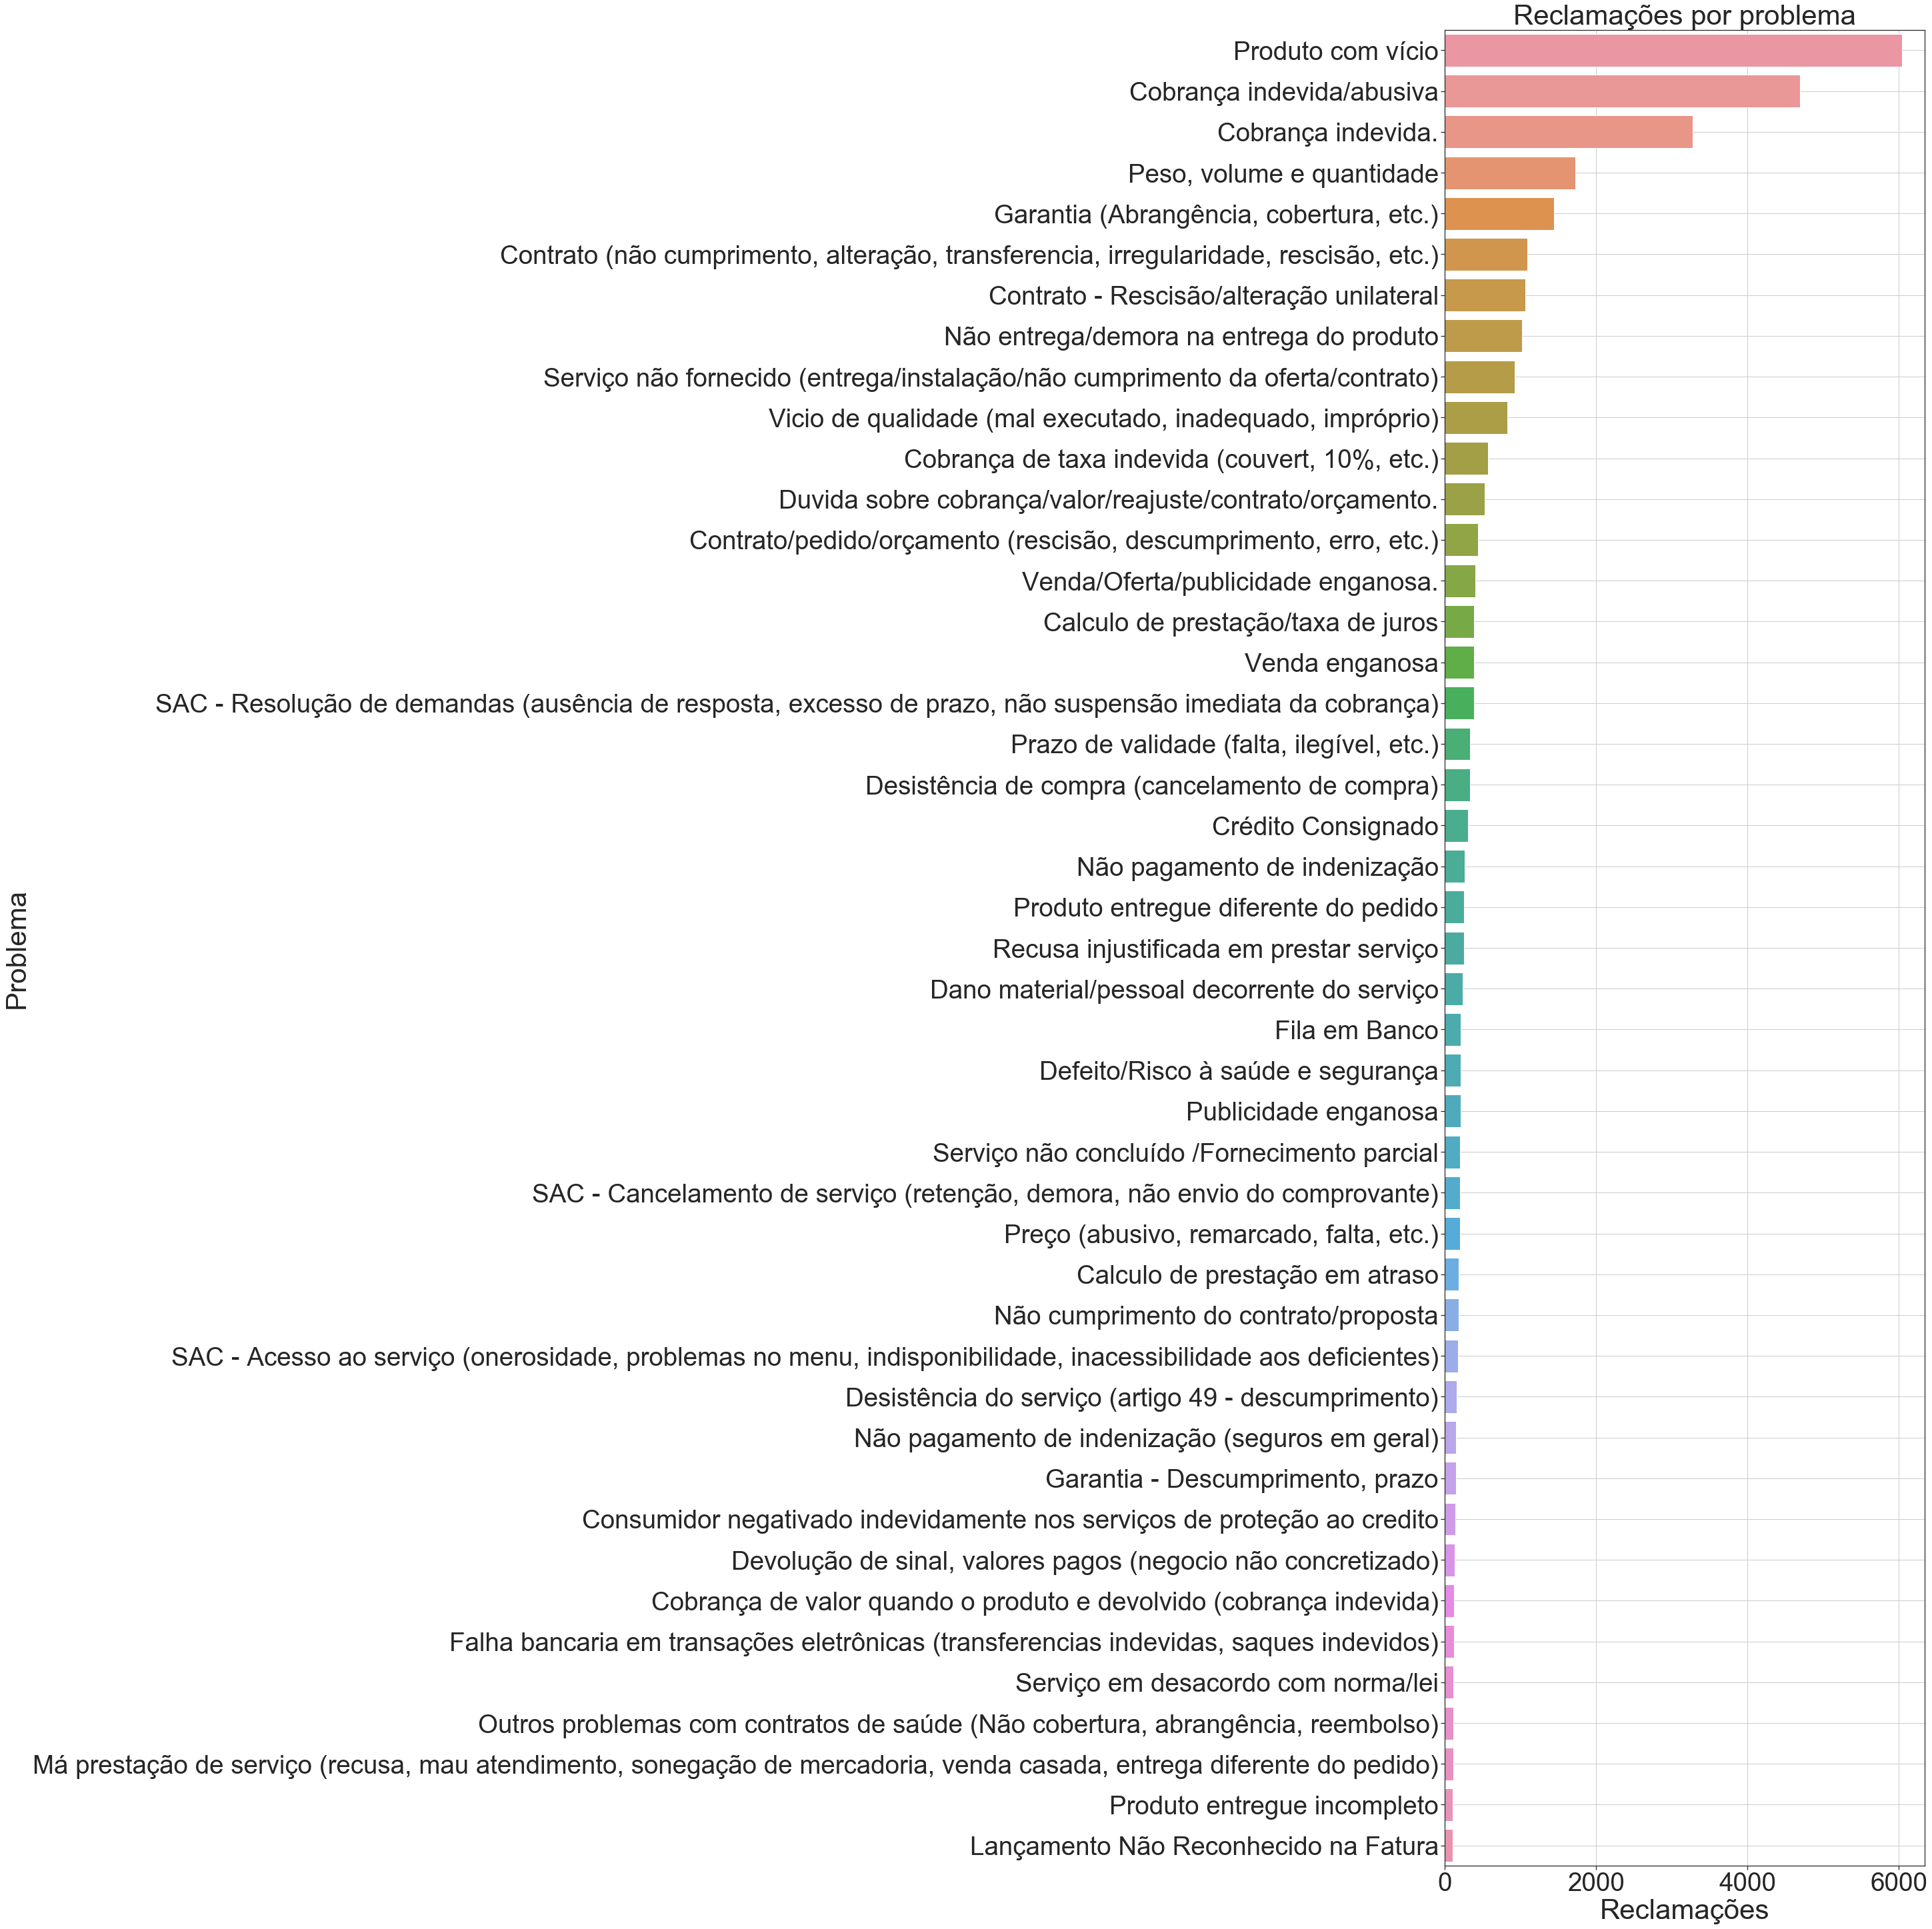

In [0]:
# Inicializa a figura do matplotlib
f, ax = plt.subplots(figsize=(40,40))
# Inicializa estilo do seaborn
sns.set(style="ticks",font_scale=3.5)
# carrega o dataset
sns.countplot(y = "problema", data=df_problema,
              order = df_problema["problema"].value_counts().index[:45])
ax.grid(True)
ax.set_title("Reclamações por problema")
ax.set_ylabel('Problema')
ax.set_xlabel('Reclamações')
plt.tight_layout(pad=0)
plt.savefig("Problema_barplot.png")
plt.show()